# KNN

In [2]:
from util.functions import train
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}   

In [10]:
from sklearn.model_selection import cross_val_score

max_accuracies = {}
for (name, dataframe) in dataframes.items(): 
    X = dataframe.drop(columns='class')
    y = dataframe['class']
    accuracies: dict[int, float] = {}
    for k in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv = 5)
        accuracies[k] = scores.mean()
    max_accuracies[name] = max(accuracies.items(), key=lambda x: x[1])
    
max_accuracies

{'mean': (1, 0.8079089026915115),
 'median': (1, 0.7764803312629399),
 'mode': (1, 0.7707660455486544),
 'KNN': (1, 0.8080745341614908),
 'MICE': (1, 0.7850931677018633),
 'iterative': (1, 0.7850931677018633)}

For each of the imputation methods, the maximum accuracy could be achieved using a number of neighbors of 1. Therefore, for the model selection, we will use the number of neighbors of 1.

In [11]:

model = KNeighborsClassifier(n_neighbors=1)

results = train(model)

learning with mean imputed data
learning with median imputed data
learning with mode imputed data
learning with KNN imputed data
learning with MICE imputed data
learning with iterative imputed data


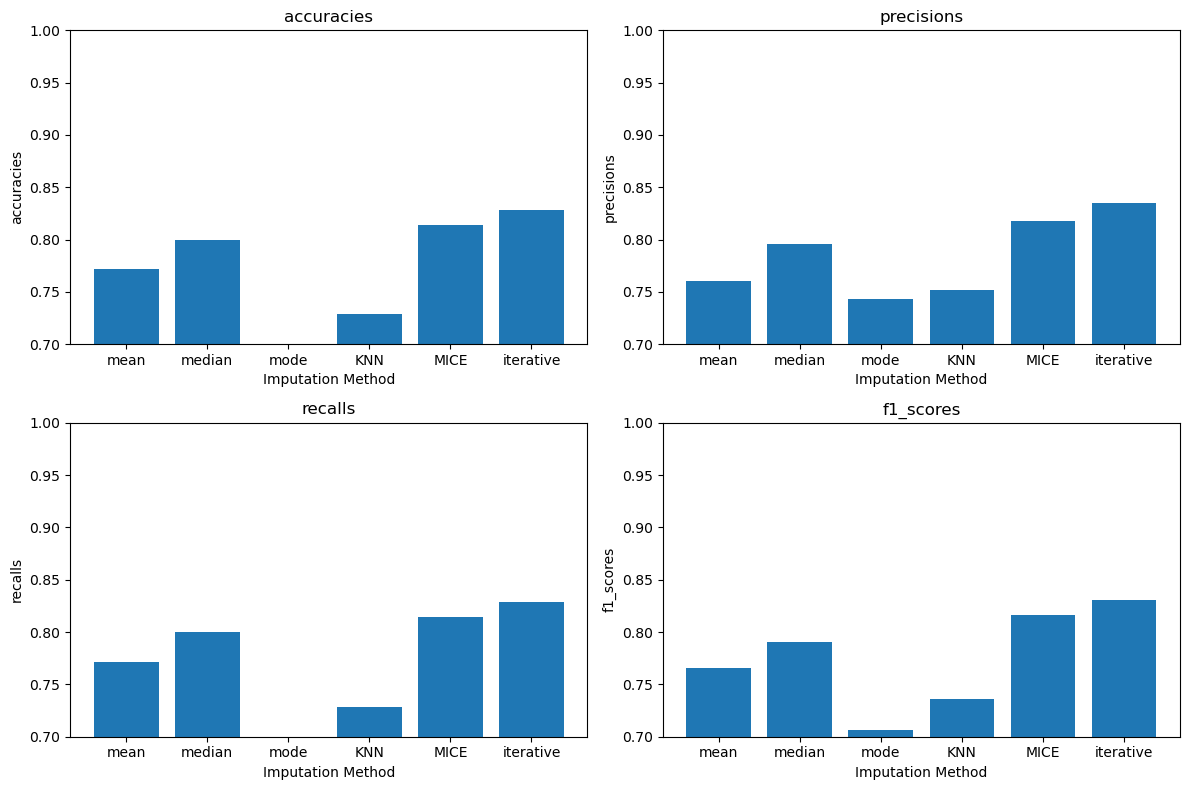

In [12]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


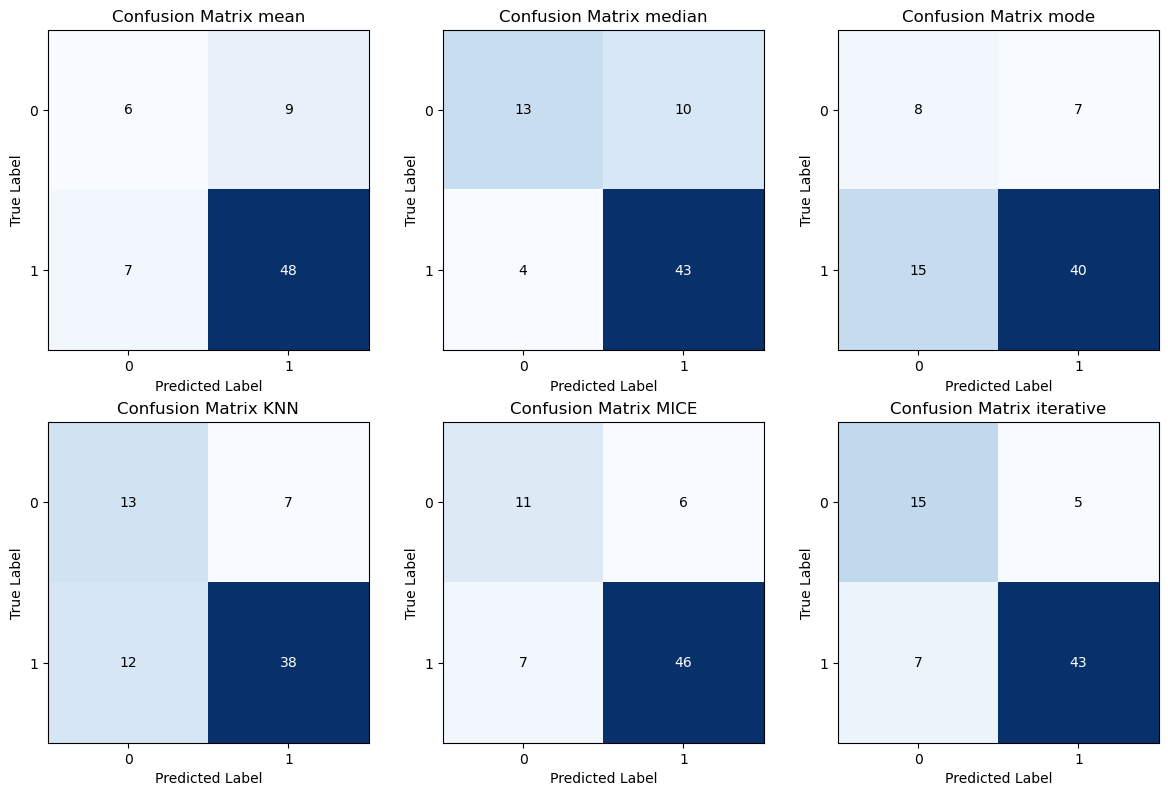

In [13]:
from util.functions import plot_confusion_matrices
plot_confusion_matrices(results['confusion_matrices'])

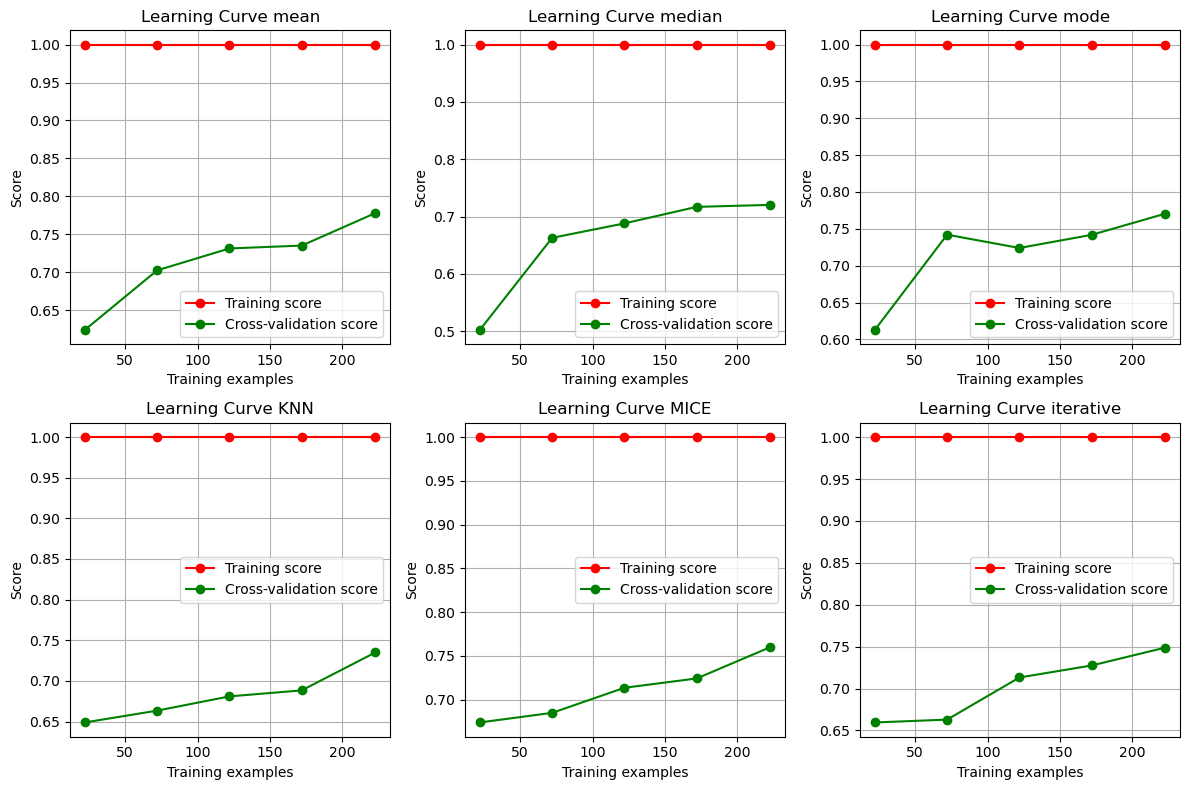

In [14]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

In [19]:
#feature importances
# todo